In [15]:
#Importando os pacotes
import sklearn as sl
import warnings
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# <b>Definição do Problema de Negócio:</b>
<br>O Banco Santander está pedindo para ajudá-los a identificar clientes
insatisfeitos no início do relacionamento. Isso permitiria que o Santander
adotasse medidas proativas para melhorar a felicidade de um cliente antes que
seja tarde demais.
Neste projeto de aprendizado de máquina, você trabalhará com centenas
de recursos anônimos para prever se um cliente está satisfeito ou insatisfeito com
sua experiência bancária.
Defina claramente o problema de negócio, faça a coleta e preparo dos
dados, escolha um algoritmo, treine o modelo e avalie a acurácia, que deve ser de
pelo menos 70%.

In [3]:
#Leitura do arquivo
df_santander = pd.read_csv("train.csv")

# Análise Exploratória de Dados

In [4]:
df_santander.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [5]:
# Visualizando as dimensões
df_santander.shape

(76020, 371)

In [6]:
len(df_santander.columns)

371

In [7]:
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [8]:
len(colunas)

9

# Aplicando PCA pela grande quantidade de variáveis no dataset

In [9]:
# Feature Extraction

# Carregando os dados
array = df_santander.values

# Separando o array em componentes de input e output
X = array[:,0:370]
Y = array[:,370]

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Seleção de atributos
pca = PCA(n_components = 10)
pca.fit(rescaledX)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Transformando os componentes em DataFrame

In [10]:
columns = ['pca_%i' % i for i in range(10)]
df_pca = pd.DataFrame(pca.transform(rescaledX), columns=columns)
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-1.274549,0.376759,0.058210,-0.440020,-0.036674,-0.114105,-0.053410,0.492737,-0.089982,0.002482
1,-0.108045,-0.048072,1.800540,0.203484,-1.324631,0.274495,-0.162960,0.485411,-0.220821,-0.078289
2,0.027928,-0.438681,-0.334540,-0.188021,-0.063513,0.081661,0.508374,0.544708,0.355974,-0.001913
3,1.427139,1.493072,-0.686884,0.024077,-0.668089,-0.843796,0.316277,0.436464,-0.617306,-0.144709
4,0.426457,0.123670,1.313034,0.190812,1.684276,-0.904387,-0.184653,0.522099,0.306390,0.336828


# Concatenando a coluna target no Dataframe de componentes

In [11]:
finalDf = pd.concat([df_pca, df_santander[['TARGET']]], axis = 1)

In [12]:
finalDf

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,TARGET
0,-1.274549,0.376759,0.058210,-0.440020,-0.036674,-0.114105,-0.053410,0.492737,-0.089982,0.002482,0
1,-0.108045,-0.048072,1.800540,0.203484,-1.324631,0.274495,-0.162960,0.485411,-0.220821,-0.078289,0
2,0.027928,-0.438681,-0.334540,-0.188021,-0.063513,0.081661,0.508374,0.544708,0.355974,-0.001913,0
3,1.427139,1.493072,-0.686884,0.024077,-0.668089,-0.843796,0.316277,0.436464,-0.617306,-0.144709,0
4,0.426457,0.123670,1.313034,0.190812,1.684276,-0.904387,-0.184653,0.522099,0.306390,0.336828,0
5,-1.274550,0.376759,0.058210,-0.440020,-0.036675,-0.114105,-0.053411,0.492659,-0.089973,0.002481,0
6,0.460807,-0.517186,-0.112370,-0.159220,0.047530,0.160684,-0.050566,0.473552,-0.271144,0.014645,0
7,0.310476,-0.433518,-0.108839,-0.030756,0.050822,0.149472,-0.104972,0.472276,-0.282317,-0.038755,0
8,-1.270854,0.384334,0.076802,-0.435112,-0.037504,-0.121772,-0.057891,0.492703,-0.089244,0.003128,0
9,0.054781,-0.450825,-0.460011,1.325209,0.015120,0.113363,-0.097433,0.478929,-0.236918,-0.008274,0


# Análise Exploratória de Dados após PCA

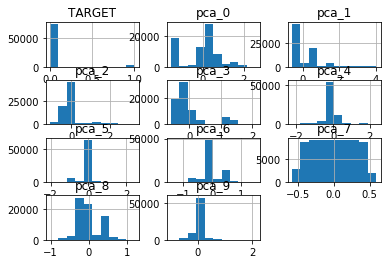

In [13]:
# Histograma Univariado
finalDf.hist()
plt.show()

# todo: Será necessário aplicar balanceamento da variável target

In [14]:
# Distribuição das classes
finalDf.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

# Comparação de Algoritmos de Classificação

LR: 0.960431 (0.002873)
LDA: 0.960431 (0.002873)
NB: 0.953999 (0.002691)
KNN: 0.956867 (0.005442)
CART: 0.914246 (0.025432)
SVM: 0.960431 (0.002873)


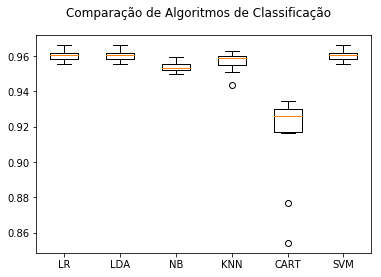

In [16]:
# Carregando os dados
array = finalDf.values

# Separando o array em componentes de input e output
X = array[:,0:10]
Y = array[:,10]

from sklearn.preprocessing import StandardScaler
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# Selecionando o melhor algoritmo de classificação (LR) e gerando o modelo

In [17]:
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo
arquivo = 'modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo salvo!
Modelo carregado!
Acurácia: 96.022
